# Part I - (Exploratory Data Visualization)
## by (Garba Hassan Usman)

## Introduction

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I look forward to answering the following questions

>1.What factors affect a loan’s outcome status?

>2.What affects the borrower’s APR or interest rate?

>3.Are there differences between loans depending on how large the original loan amount was?




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
# using numpy and pandas to save our data
# using matplotlib and seaborn to create our visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in the dataset and describe its properties


In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

## Dataset Overview

In [3]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# high-level overview of data shape and composition
print(loan.shape)

(113937, 81)


In [5]:
print(loan.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [6]:
print(loan.head(10))

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Curr

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan. The dataset consists of mostly numerical variables, and few categorical variables

### What is/are the main feature(s) of interest in your dataset?

> My interest lies in the following variables; loan amount, borrower rate (or interest rate), current loan status, borrower APR, borrower income, and few others.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features of the dataset will come in handy in when investigating my features of interest; loan amount, borrower rate (or interest rate), current loan status, borrower APR, borrower income, ProsperScore, LenderYield

## Univariate Exploration

> I investigated distributions of individual variables in preparations to look at relationships between variables.

In [7]:
# Convert ProsperRating to an ordered type
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
loan.loc[:,'ProsperRating (Alpha)'] = loan.loc[:,'ProsperRating (Alpha)'].astype(ordered_var, copy=True)

In [8]:
# Convert  Employment status to an ordered type
emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = emp_order)
loan.loc[:,'EmploymentStatus'] = loan.loc[:,'EmploymentStatus'].astype(ordered_var, copy=True)

### Loan Term
> Which of the loan terms has the highest frequency ?

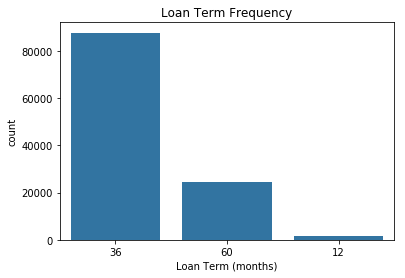

In [9]:
# plot the term of the loan
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

freq = loan['Term'].value_counts()

# Get the indexes of the Series
Term_order = freq.index

# Use the `color` argument
sb.countplot(data=loan, x='Term', color=base_color, order=Term_order);
plt.xlabel('Loan Term (months)');
plt.title('Loan Term Frequency');

In [10]:
Term_order = loan["Term"].value_counts().index

> From the above visualization, the most frequent repayment term is 36 months, followed by 60 months, while 12 months has the lowest frequency.

#### Employment Status
> How does the employment status affect the loan amount

In [11]:
Type_order = loan["EmploymentStatus"].value_counts().index

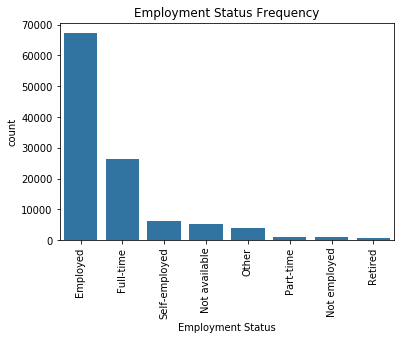

In [12]:
# Plot the employment status
sb.countplot(data=loan, x='EmploymentStatus', color=base_color, order=Type_order);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency');

> Individuals that fall under the **Employed** received loan more than every other category.

#### Borrower State
> Which state has the highest loan ?

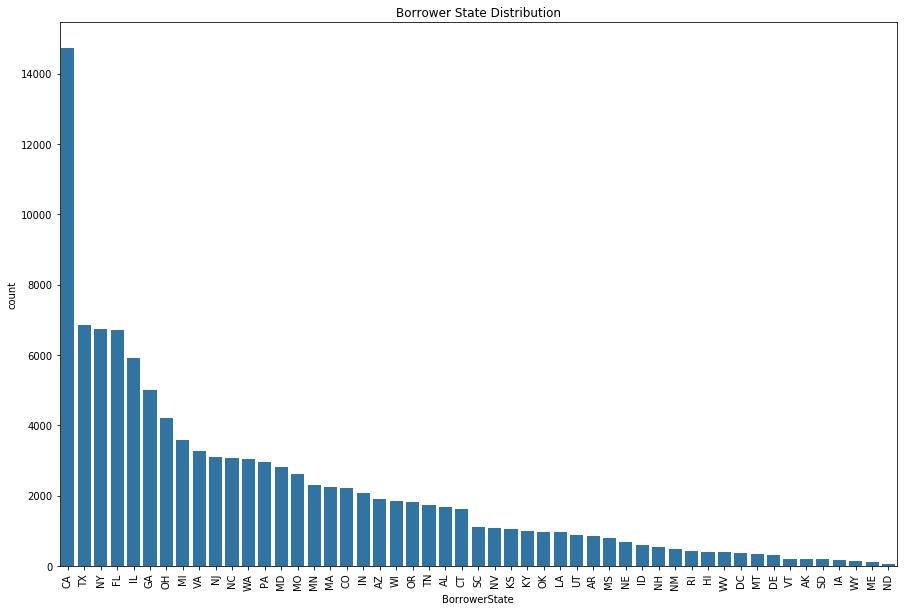

In [13]:
#Borrower State Distrobution
cat_order = loan['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=loan,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

> From the visualization above, CA has the highest frequency, followed by TX, NY, and FL.

#### ProsperScore
> How does the score affect the loan ?

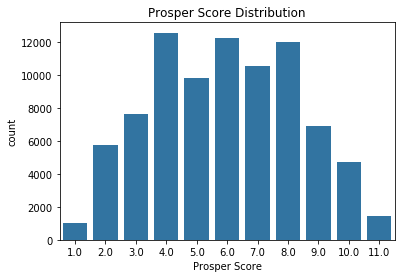

In [14]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

> The range affects the loan, the higher the range the better, and vice versa.

#### ProsperRating (Alpha)
> Which category had the most loan ?

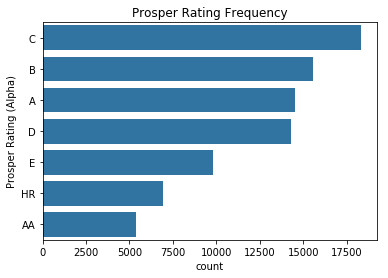

In [15]:
# Plot the Prosper Rating 
type_order = loan['ProsperRating (Alpha)'].value_counts().index
sb.countplot(data=loan, y='ProsperRating (Alpha)', color=base_color, order=type_order);
plt.ylabel('Prosper Rating (Alpha)');
plt.title('Prosper Rating Frequency');

> Most of the borrowers are in the category C

#### Loan Original Amount
>What is the highest value of the original amount ?

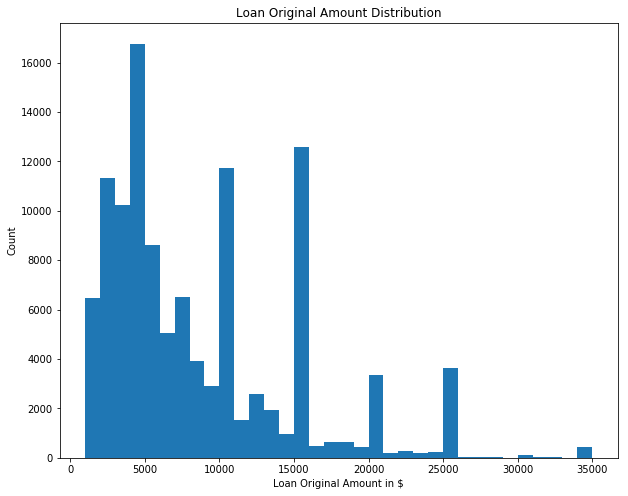

In [16]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(loan['LoanOriginalAmount'].min(), loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

>  This cannot be properly ascertain as the destribution is skewed and it has a long tail. Hence, I'll have to put the distribution on a long scale.

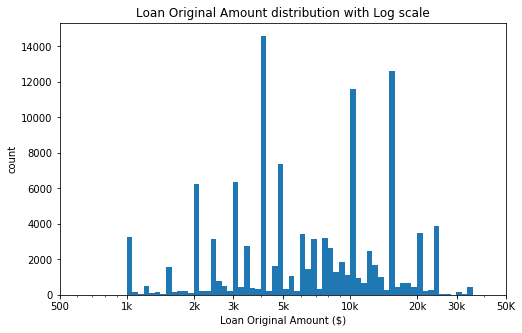

In [17]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

> The highest value for the original loan amount is in between 3k - 5k. Also, there was an increase between the 10k - 20k value.

#### Lender Yield
> How is the lender yield distributed ?

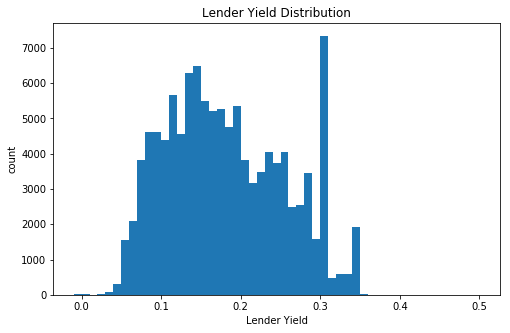

In [18]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(loan['LenderYield'].min(), loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

> The lender yield is distributed with the highest value. Most of the value is between 0.1 - 0.2, and 0.3 has the highest yield value.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I applied a log transformation to the distribution of loan original amount, which is right skewed, in order to interpret the picture. These variables, Monthly Loan Payment, Investors, and Amount Delinquent, likewise underwent the log transformation.

> The most loans were originated in the year 2013. The state of California (CA) had the most loans. Although the service costs were left skewed, I was unable to apply the log scale due to the negative amounts.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A log scale was used to represent the concealed distribution in some places for features with long-tailed, skewed distributions. Additionally, because of the wide range of AmountDelinquent numbers, the distribution was difficult for me to read clearly, so I applied the log transformation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [19]:
numeric_vars = loan.select_dtypes(include='number').columns
categoric_vars = ['Term', 'EmploymentStatus', 'ProsperRating (Alpha)']

> **What's most common Employment Status in each Prosper Rating ?**

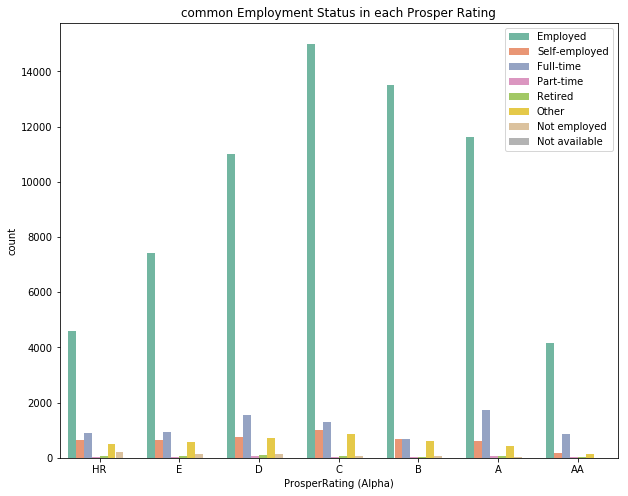

In [20]:
plt.figure(figsize = [10, 8])
sb.countplot(data=loan, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette='Set2');
plt.legend(loc=1);
plt.title("common Employment Status in each Prosper Rating");

> Higher proportions of people with the employment statuses of Not Employed, Self-Employed, Retired, and Part-Time were observed in lower ratings.

> **What connection or pattern exists among the dataset's numerical variables?**

In [21]:
# Let's make a list of all numerical variables
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower',
               'CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome']

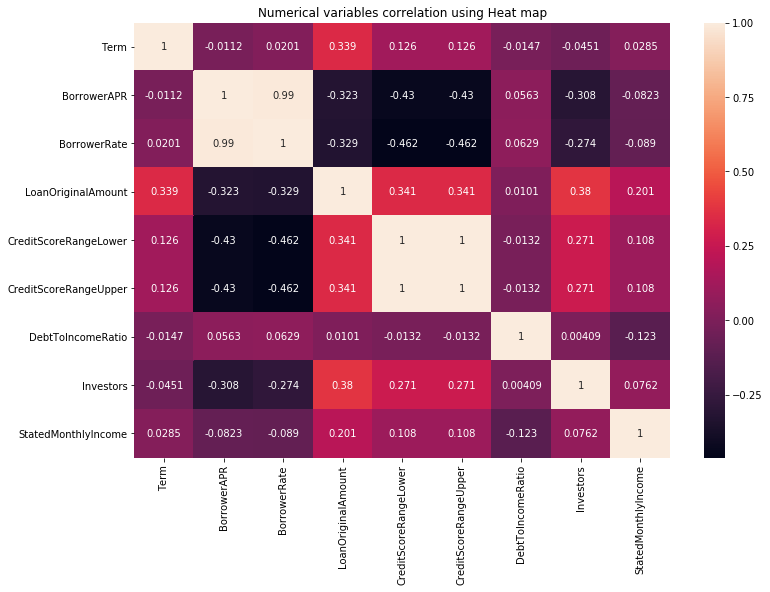

In [22]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(12,8))
sb.heatmap(data=loan[numeric_var].corr(),annot=True,fmt='.3g')
plt.title('Numerical variables correlation using Heat map');

> Borrower APR and rate exhibit a significant link. If the APR increases, the borrower rate will also, and vice versa. The initial loan amount and investors have a moderate link.

> **What connection exists between the original loan amount and the borrower APR?**

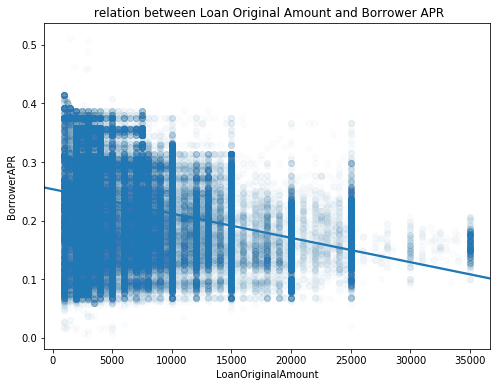

In [23]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/50});
plt.title(" relation between Loan Original Amount and Borrower APR");

> According to this graph, the borrower's APR has a wide range of values depending on the size of the total loan amount, but the range of APR diminishes as the loan amount rises. Therefore, there is a bad correlation between the borrower's APR and the overall loan amount.

#### What relationship does BorrowerRate have with CreditGrade, ProsperRating, and ProsperScore?

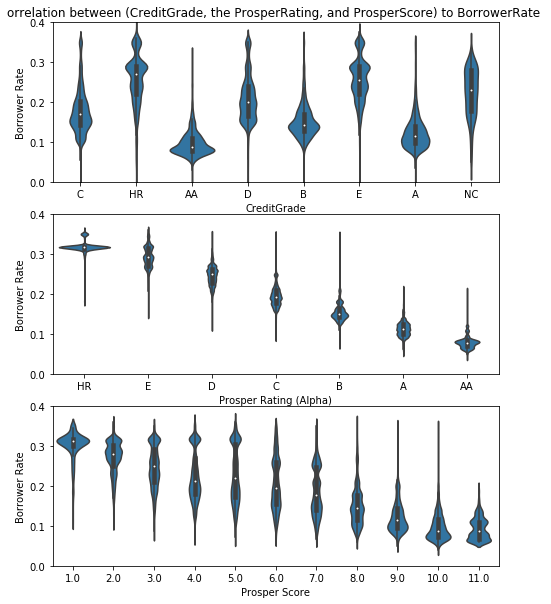

In [24]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
sb.violinplot(data=loan, x='CreditGrade', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("CreditGrade");
plt.ylabel("Borrower Rate");
plt.title("orrelation between (CreditGrade, the ProsperRating, and ProsperScore) to BorrowerRate ");


plt.subplot(3,1,2)
sb.violinplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("Borrower Rate");

plt.subplot(3,1,3)
sb.violinplot(data=loan, x='ProsperScore', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));
plt.xlabel("Prosper Score");
plt.ylabel("Borrower Rate");

> The plots depict how the various credit risks are distributed, and according to BorrowerRate, there is a direct inverse relationship between credit score and interest rate. Once more, the results for the ProsperRating (Alpha) variable, where the fall is sharper, demonstrate this the most. There is still a reduction with ProsperScore, but the distribution of the BorrowerRate is more even and the IQR is often higher for each grade.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower APR and rate exhibit a significant link. If the APR increases, the borrower rate will also, and vice versa. The initial loan amount and investors have a moderate link.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> According to this graph, the borrower's APR has a wide range of values depending on the size of the total loan amount, but the range of APR diminishes as the loan amount rises. Therefore, there is a bad correlation between the borrower's APR and the overall loan amount.

## Multivariate Exploration

> I'll create plots of three or more variables to investigate my data even
further.

#### How do the rating and term effect the APR of the borrower?

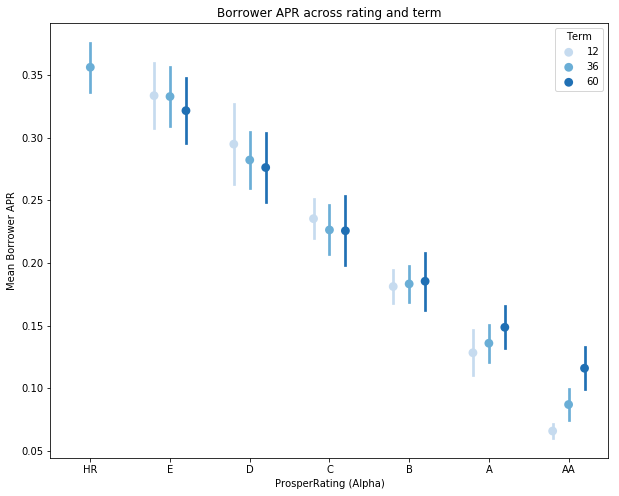

In [25]:
plt.figure(figsize = [10,8])
sb.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR');

> For borrowers with HR & C ratings, the borrower APR reduces as the borrow period lengthens. However, the APR rises as the borrow time lengthens for those with B and AA credit ratings.

#### How are the three category traits related to one another?

> how the BorrowerRate changes for different loan Terms when split up by ProsperRating?

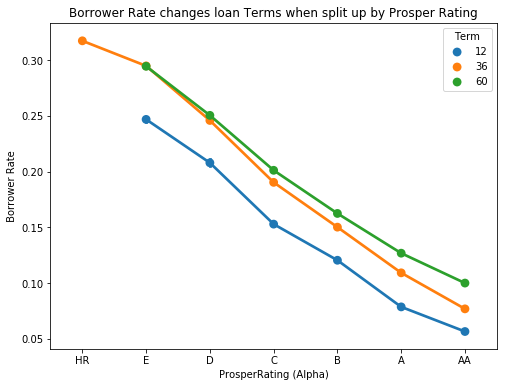

In [26]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
plt.figure(figsize=[8,6])

sb.pointplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term',
                   palette='tab10');
plt.legend(loc=1, title='Term');
plt.title('Borrower Rate changes loan Terms when split up by Prosper Rating');
plt.ylabel(' Borrower Rate ');

> The BorrowerRate rises for loans with longer terms at every level of ProsperRating. Given that loans with shorter terms typically have higher interest rates, I would anticipate the opposite. This is a little surprising because it was not at all obvious in the bivariate analysis.

#### How are the three category traits related to one another; LenderYield vs Borrower APR  vs ProsperRating ?

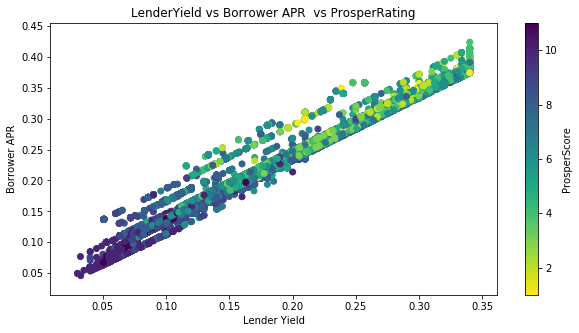

In [27]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

> The lender yield and borrower APR have a straight positive inverse relationship, with the lender yield rising as the borrower pays more interest. Lower borrower interest rates and hence lower lender yields result with higher credit scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The lender yield and borrower APR have a straight positive inverse relationship, with the lender yield rising as the borrower pays more interest. Lower borrower interest rates and hence lower lender yields result with higher credit scores.

### Were there any interesting or surprising interactions between features?

> The BorrowerRate rises for loans with longer terms at every level of ProsperRating. Given that loans with shorter terms typically have higher interest rates, I would anticipate the opposite. This is a little surprising because it was not at all obvious in the bivariate analysis.

## Conclusions
> The lender yield and borrower APR have a straight positive inverse relationship, with the lender yield rising as the borrower pays more interest. According to this graph, the borrower's APR has a wide range of values depending on the size of the total loan amount, but the range of APR diminishes as the loan amount rises. There is a bad correlation between the APR and the overall loan amount. The BorrowerRate rises for loans with longer terms at every level of ProsperRating. 
